In [113]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.utils import check_random_state
from sklearn.metrics.pairwise import distance_metrics
import math

In [114]:
x = np.array([[1,2], [1.5,1.8], [5,8], [8,8], [1,0.6], [9,11]])

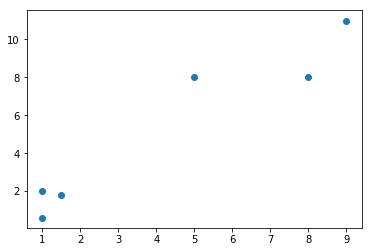

In [115]:
plt.scatter(x[:,0],x[:,1])
plt.show()

In [116]:
alpha = 0.456
def min_distance_cluster(point, means, k):
    min_distance = 0
    for i in range(k):
        euc_distance = ((means[i] - point)**2).sum()
        if euc_distance < min_distance :
            min_distance = euc_distance
            cluster = i
    return cluster        

In [117]:
def fit(data, k = 2, max_iter = 100):
    means = [] #list of means
    for i in range(k):
        means.append(data[i])
    
    for i in range(max_iter):
        clusters = []
        for j in range(k):
            clusters.append([])
        #assign the data point to the cluster they belong to 
        for point in data:
            #find distance to all_mean values
            distances = [((m - point)**2).sum() for m in means]
            #find the min distance
            minDistance = min(distances)
            #find the mean for which we got the min_distance --- l
            l = distances.index(minDistance)
            #add this point to cluster l
            clusters[l].append(point)
            
        #update new_means
        change = False
        for j in range(k):
            new_mean = np.average(clusters[j], axis = 0)
            if not np.array_equal(means[j],new_mean):
                change = True
            means[j] = new_mean
        if not change:
            break
    return means         

In [118]:
def predict(test_data,means):
    predictions = []
    for point in test_data:
            #find distance to all_mean values
            distances = [((m - point)**2).sum() for m in means]
            #find the min distance
            minDistance = min(distances)
            #find the mean for which we got the min_distance --- l
            l = distances.index(minDistance)
            #add this point to cluster l
            predictions.append(l)  
    return predictions  


In [119]:
means = fit(x)

In [120]:
predictions = predict(x,means)
predictions

[0, 0, 1, 1, 0, 1]

# Silhouette score

In [121]:
def silhouette_score(X, labels, metric='euclidean', sample_size=None,
                          random_state=None, **kwds):
    if sample_size is not None:
        random_state = check_random_state(random_state)
        indices = random_state.permutation(X.shape[0])[:sample_size]
        X, labels = X[indices], labels[indices]          
    return np.mean(silhouette_samples(X, labels, metric=metric, **kwds))


def silhouette_samples(X, labels, metric='euclidean', **kwds):
    metric = distance_metrics()[metric]
    n = labels.shape[0]
    
    A = np.array([_intra_cluster_distance(X, labels, metric, i)
                  for i in range(n)])
    B = np.array([_nearest_cluster_distance(X, labels, metric, i)
                  for i in range(n)])
    sil_samples = (B - A) / np.maximum(A, B)
    return np.nan_to_num(sil_samples)

def metric1(x1, x2):
    return  math.sqrt(((x1-x2)**2).sum())

def _intra_cluster_distance(X, labels, metric, i):
    indices = np.where(labels == labels[i])[0]
    if len(indices) == 0:
        return 0.
    
    a = np.mean([metric1(X[i], X[j]) for j in indices if not i == j])
    return a


def _nearest_cluster_distance(X, labels, metric, i):
    label = labels[i]
    labels = labels.reshape(labels.shape[0],)
    b = np.min(
            [np.mean(
                [metric1(X[i], X[j]) for j in np.where(labels == cur_label)[0]]
            ) for cur_label in set(labels) if not cur_label == label])
    return b



In [122]:
predictions = np.array(predictions).reshape(-1,1)

In [123]:
predictions.shape

(6, 1)

In [124]:
print(silhouette_score(x,predictions))

0.7479566620911685


# IMPLEMENTING CLUSTER CLASS

In [125]:
class cluster:
    def __init__(self,k = 2, max_iter = 100):
        print("constructor")
        self.k = k
        self.max_iter = max_iter
    
    def fit(self, data):
        self.means = [] #list of means
        for i in range(self.k):
            self.means.append(data[i])
        for i in range(self.max_iter):
            clusters = []
            for j in range(self.k):
                clusters.append([])
            #assign the data point to the cluster they belong to 
            for point in data:
                #find distance to all_mean values
                distances = [((m - point)**2).sum() for m in self.means]
                #find the min distance
                minDistance = min(distances)
                #find the mean for which we got the min_distance --- l
                l = distances.index(minDistance)
                #add this point to cluster l
                clusters[l].append(point)
            #update new_means
            change = False
            for j in range(self.k):
                new_mean = np.average(clusters[j], axis = 0)
                if not np.array_equal(self.means[j],new_mean):
                    change = True
                self.means[j] = new_mean
            if not change:
                break  
    
    def predict(self, test_data):
        predictions = []
        for point in test_data:
                #find distance to all_mean values
                distances = [((m - point)**2).sum() for m in self.means]
                #find the min distance
                minDistance = min(distances)
                #find the mean for which we got the min_distance --- l
                l = distances.index(minDistance)
                #add this point to cluster l
                predictions.append(l)  
        return predictions 

In [126]:
k_means = cluster(2,10)

constructor


In [127]:
k_means.fit(x)

In [128]:
k_means.predict(x)

[0, 0, 1, 1, 0, 1]

In [129]:
k_means.means

[array([1.16666667, 1.46666667]), array([7.33333333, 9.        ])]

In [130]:
import pandas as pd

In [131]:
cr = pd.read_csv('crime2.csv')

In [132]:
cr.head()

,localities,assassination,theft,gang_rape,burglary,rape,assualt_attack,harassment(sexual),crime_total,area_total,longitude,latatitude,area/1000000,crime_total/area
0,JAFFARPUR KALAN,4,724,2,41,11,11,6,799,7.048170e+07,76.91555,28.59572,70.481699,11.336276
1,MUNDKA,3,244,1,14,5,12,4,270,4.859457e+07,76.96085,28.67042,48.594571,5.556176
2,BABA HARI DAS NAGAR,4,414,2,70,9,18,8,512,2.899435e+07,76.96681,28.62867,28.994346,17.658615
3,NAJAFGARH,4,900,1,60,4,10,10,973,8.473809e+06,76.98269,28.60975,8.473809,114.824393
4,CHHAWLA,4,485,1,65,6,16,11,575,2.632166e+07,76.99466,28.58691,26.321658,21.845129


In [254]:
data = cr.iloc[:,[1,2,3,4,5,6,7,13]].values

In [290]:
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
data = sc_X.fit_transform(data)

In [291]:
data[0:5]

array([[0.16666667, 0.55032468, 0.16666667, 0.29133858, 0.25581395,
        0.13432836, 0.125     , 0.00893937],
       [0.08333333, 0.16071429, 0.        , 0.07874016, 0.11627907,
        0.14925373, 0.075     , 0.00149898],
       [0.16666667, 0.2987013 , 0.16666667, 0.51968504, 0.20930233,
        0.23880597, 0.175     , 0.01707776],
       [0.16666667, 0.69318182, 0.        , 0.44094488, 0.09302326,
        0.11940299, 0.225     , 0.14215369],
       [0.16666667, 0.35633117, 0.        , 0.48031496, 0.13953488,
        0.20895522, 0.25      , 0.02246682]])

In [292]:
from sklearn.cluster import KMeans 

In [293]:
clf = KMeans(n_clusters = 5,init = 'k-means++')

In [294]:
clf.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [295]:
cr.head()

,localities,assassination,theft,gang_rape,burglary,rape,assualt_attack,harassment(sexual),crime_total,area_total,longitude,latatitude,area/1000000,crime_total/area
0,JAFFARPUR KALAN,4,724,2,41,11,11,6,799,7.048170e+07,76.91555,28.59572,70.481699,11.336276
1,MUNDKA,3,244,1,14,5,12,4,270,4.859457e+07,76.96085,28.67042,48.594571,5.556176
2,BABA HARI DAS NAGAR,4,414,2,70,9,18,8,512,2.899435e+07,76.96681,28.62867,28.994346,17.658615
3,NAJAFGARH,4,900,1,60,4,10,10,973,8.473809e+06,76.98269,28.60975,8.473809,114.824393
4,CHHAWLA,4,485,1,65,6,16,11,575,2.632166e+07,76.99466,28.58691,26.321658,21.845129


In [296]:
clf.cluster_centers_

array([[0.37121212, 0.65429457, 0.3030303 , 0.44738726, 0.55179704,
        0.66621438, 0.40227273, 0.56691149],
       [0.12984496, 0.12843552, 0.03100775, 0.10803882, 0.12925906,
        0.10482471, 0.11104651, 0.0976565 ],
       [0.50757576, 0.23199528, 0.35353535, 0.23120974, 0.41155743,
        0.36770692, 0.2780303 , 0.17481601],
       [0.66203704, 0.37802128, 0.12037037, 0.56036745, 0.32299742,
        0.31343284, 0.41388889, 0.32430609],
       [0.19125683, 0.34742921, 0.13934426, 0.29250032, 0.24857034,
        0.26792268, 0.23360656, 0.21105425]])

In [297]:
safety = []
c = 0
for li in clf.cluster_centers_:
    sum = 0;
    sum += li[2] + li[4] + li[6]
    safety.append((sum,c))
    c += 1
safety = sorted(safety)

In [298]:
safety

[(0.2713133225166756, 1),
 (0.6215211589782691, 4),
 (0.8572566752799311, 3),
 (1.0431230913789054, 2),
 (1.2571000704721635, 0)]

In [299]:
dict1 = {}
m = 0
for s in safety:
    dict1[s[1]] = m 
    m += 1

In [300]:
dict1

{1: 0, 4: 1, 3: 2, 2: 3, 0: 4}

In [301]:
clust_pred = np.array(clf.fit_predict(data)).reshape(-1,1)

## silhoutee score using cluster 1 algorithm

In [302]:
print(silhouette_score(data,clust_pred))

0.18195047835054512


## silhoutee score using agglomerative clustering algorithm

In [303]:
from sklearn.cluster import AgglomerativeClustering
clf1 = AgglomerativeClustering(n_clusters = 5)

In [304]:
predictions = clf1.fit_predict(data)
print(silhouette_score(data,predictions))

0.16118537889676013


In [305]:
clust_pred = clust_pred.reshape(len(clust_pred),)
clust_pred[10:25]

array([1, 3, 4, 2, 4, 1, 0, 1, 3, 1, 1, 3, 0, 0, 4])

In [306]:
mag_pred = clust_pred.copy()
for i in range(len(clust_pred)):
    mag_pred[i] = dict1[clust_pred[i]]

In [307]:
mag_pred

array([0, 2, 0, 0, 0, 0, 2, 1, 4, 1, 0, 2, 1, 3, 1, 0, 4, 0, 2, 0, 0, 2,
       4, 4, 1, 2, 2, 4, 0, 4, 0, 0, 4, 2, 4, 1, 0, 0, 0, 0, 4, 2, 2, 1,
       3, 4, 0, 1, 2, 3, 0, 4, 3, 1, 0, 2, 4, 1, 0, 0, 4, 0, 0, 2, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 4, 3, 2, 4, 1,
       4, 0, 0, 1, 2, 0, 1, 0, 0, 0, 4, 0, 1, 3, 4, 0, 4, 2, 2, 0, 2, 2,
       2, 1, 1, 0, 2, 2, 2, 3, 2, 2, 4, 0, 2, 4, 2, 2, 3, 0, 4, 0, 2, 1,
       0, 2, 2, 4, 4, 2, 2, 4, 0, 2, 3, 0, 0, 4, 0, 4, 1, 0, 4, 4, 0, 2,
       4, 0, 2, 2, 4, 3, 1, 2, 2, 2, 0, 2])

In [308]:
mag_pred[10:25]

array([0, 2, 1, 3, 1, 0, 4, 0, 2, 0, 0, 2, 4, 4, 1])

In [309]:
from sklearn.cluster import DBSCAN

In [310]:
test = data.copy()

In [311]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(test)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [312]:
pca.explained_variance_

array([0.12235414, 0.04633885, 0.04044539, 0.03162978, 0.02584815,
       0.0203532 , 0.01300391, 0.00824677])

In [313]:
pca = PCA(n_components = 2,whiten = True)
transformed_data = pca.fit_transform(test)

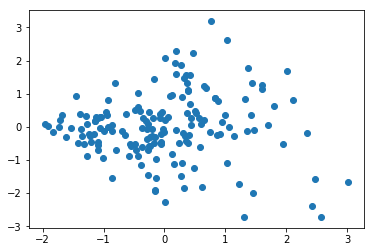

In [314]:
plt.scatter(transformed_data[:,0],transformed_data[:,1])
plt.show()

In [329]:
test_clf = KMeans(n_clusters =5)

In [330]:
test_clf.fit(transformed_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [331]:
test_pred = np.array(test_clf.fit_predict(test)).reshape(-1,1)

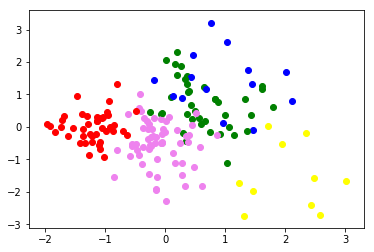

In [332]:
for i in range(166):
    if(test_pred[i] == 0):
        plt.scatter(transformed_data[i,0],transformed_data[i,1],color = 'red')
    elif(test_pred[i] == 1):
        plt.scatter(transformed_data[i,0],transformed_data[i,1],color = 'blue')
    elif(test_pred[i] == 2):
        plt.scatter(transformed_data[i,0],transformed_data[i,1],color = 'green')
    elif(test_pred[i] == 3):
        plt.scatter(transformed_data[i,0],transformed_data[i,1],color = 'violet')
    elif(test_pred[i] == 4):
        plt.scatter(transformed_data[i,0],transformed_data[i,1],color = 'yellow')

In [333]:
x = np.array([[1,2], [1.5,1.8], [5,6], [6,6], [1,3], [2,2], [2,1], [6,5], [5,5],[10,10],[9,8],[9,10],[10,9]])

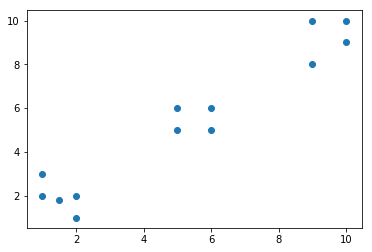

In [334]:
plt.scatter(x[:,0],x[:,1])
plt.show()

In [335]:
from sklearn.cluster import KMeans

In [336]:
clf = KMeans(n_clusters = 3)

In [337]:
pred = clf.fit_predict(x)

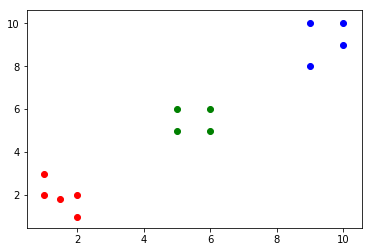

In [338]:
for i in range(13):
    if(pred[i] == 0):
        plt.scatter(x[i,0],x[i,1],color = 'red')
    elif(pred[i] == 1):
        plt.scatter(x[i,0],x[i,1],color = 'blue')
    elif(pred[i] == 2):
        plt.scatter(x[i,0],x[i,1],color = 'green')